In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = 'dsu7.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

def nothing(x):
    pass


cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()



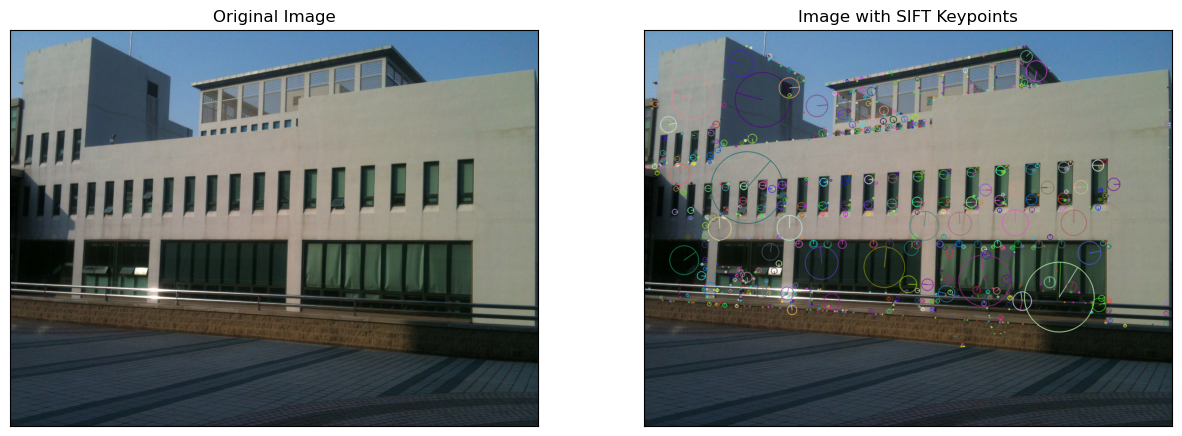

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = 'dsu7.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()
kp = sift.detect(gray, None)


imgsift = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(imgsift, cv2.COLOR_BGR2RGB))
plt.title('Image with SIFT Keypoints'), plt.xticks([]), plt.yticks([])
plt.show()